# Tutoriel d'exemple de résolution d'un problème de machine learning

## Problématique étudiée


Cet ensemble de données consiste en la longueur des pétales et des sépales de 3 types différents d'iris (*Setosa, Versicolour et Virginica*), stockée dans un tableau numpy.ndarray de 150x4.

Les lignes étant les échantillons et les colonnes étant : Longueur du sépale, Largeur du sépale, Longueur du pétale et Largeur du pétale.

Nous allons maintenant passer à une autre catégorie de modèles d'apprentissage automatique non supervisés : K-Means (*clustering algorithms*).
Les algorithmes de clustering cherchent à apprendre, à partir des propriétés des données, une division optimale ou un étiquetage discret de groupes de points.

## Code

## Importation de librairies 

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

# Importation du dataset


Nous allons charger le jeu de données Iris. Ce jeu de données contient les mesures des fleures. 

In [47]:
iris = datasets.load_iris()
X = iris.data
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

La description détaillée nous indique que ce dataset contient les longueurs et largeurs des pétales et sépales de 150 iris. Ces 1560 iris sont eux-mêmes séparés en trois types. La description de scikit-learn nous donne aussi des information intéressantes concernant la corrélation entre ces données et le type de la fleur : alors que la longueur et la largeur des pétales semblent être fortement liées au type de la fleur, la longueur et la largeur des sépales ne sont que faiblement corrélées au type de la fleur. Cet élément aura son importance plus loin dans ce tutoriel.

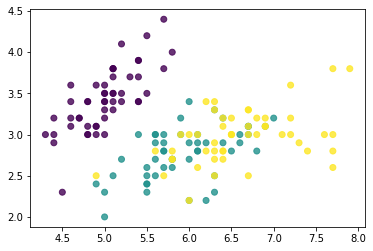

In [44]:
plt.scatter(X[:, 0], X[:,1], c=y, alpha=0.8)

Le graphique ci-dessus utilise les deux premières caractéristiques. 


## Phase d'apprentissage du modèle

L'algorithme k-Means est suffisamment simple pour que nous puissions l'écrire en quelques lignes de code. Ce qui suit est une implémentation très basique.

Nous pouvons maintenant créer nos modèles et les entraîner :


In [49]:
model = KMeans(n_clusters=3, random_state = 5)
model.fit(X)
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

ici on peux voir le score de notre modele

In [48]:
model.score(X)

-78.851441426146

## Visualisez les résultats du classificateur


Text(0.5, 1.0, 'K-Means Classification')

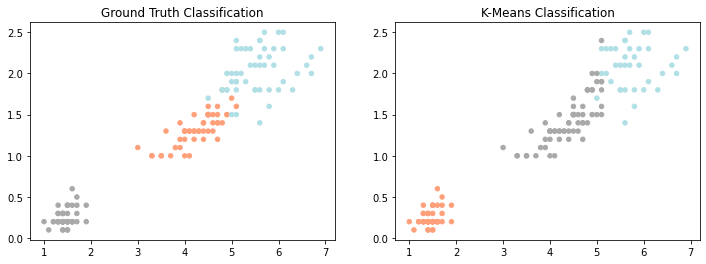

In [32]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=20, alpha=1)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[model.labels_], s=20, alpha=1)
plt.title('K-Means Classification')

En nous basant sur la longueur et la largeur de chaque pétale, on peut afficher, dans un plan 2D, les différentes fleurs de notre jeu de données. Visuellement, on voit qu’il y a deux grands groupes qui se forment.

Ici, nous traçons la longueur et la largeur des pétales, mais chaque tracé change les couleurs des points en utilisant soit colormap [y.Targets] pour la classe originale et colormap [model.labels_] pour la classe prédite.

In [33]:
relabel = np.choose(model.labels_,[2,0,1]).astype(np.int64)


 Visualisons les résultats en traçant les données colorées par ces étiquettes. Nous allons également tracer les centres des clusters tels que déterminés par l'estimateur k-means :

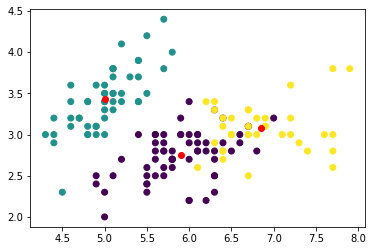

In [34]:
plt.scatter(X[:,0], X[:, 1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

La bonne nouvelle, c'est que l'algorithme des k-means (du moins dans ce cas simple) attribue les points aux groupes de manière très similaire à la manière dont nous pourrions les attribuer à l'œil nu.

In [35]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.05      0.04      0.05        50
           2       0.23      0.28      0.25        50

    accuracy                           0.44       150
   macro avg       0.43      0.44      0.43       150
weighted avg       0.43      0.44      0.43       150



In [41]:
data, labels = datasets.load_iris(return_X_y=True)
(n_samples, n_features), n_digits = X.shape, np.unique(labels).size


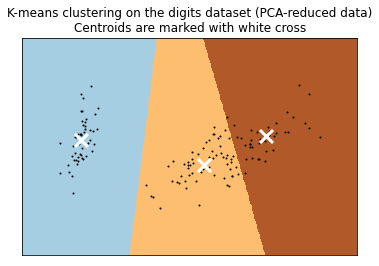

In [39]:

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

On remarque que les clusters formés dans la figure "Classification K-means" sont proches de ceux de la figure "Classification réel" qui représente la “vraie” répartition des données Iris en fonction de leurs étiquettes.

Ainsi, on remarque que les algorithmes de Clustering (pour notre cas K-Means) permettent de répartir en groupes des jeux de données en fonction de leurs caractéristiques et ce, sans avoir besoin de leurs étiquettes (variable y) correspondante.